In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**概率**（Probability）是用来描述事件发生的可能性的数值。

概率这门学科里的一些基本概念：
- **随机变量**（Random Variable），用来描述事件所有可能出现的状态；
- **概率分布**（Probability Distribution），描述*随机变量*的状态出现的可能性；
- *随机变量*根据取值是否连续，分为
  - **离散型随机变量**（Discrete Random Variable）
  - **连续型随机变量**（Continuous Random Variable）

**概率论**研究的是概率之间相互转化的关系，比如联合概率，条件概率和边缘概率。


概率论中产生了著名的**贝叶斯定理**（Bayes’ theorem）。加上变量的独立性，我们就可以构建**朴素贝叶斯（Naive Bayes）分类算法**，这个算法在机器学习中的应用非常广泛，我们后面也会有一节课专门来讲。此外，基于概率发展而来的信息论，提出了很多重要的概率，例如**信息熵**（Entropy）/ **香农熵**（Shannon Entropy）、**信息增益**（Information Gain）、**基尼指数**（Gini）等。这些概念都被运用到了**决策树**（Decision Tree）的算法中。

概率和统计其实是互逆的？
概率研究的是模型如何产生数据，统计研究的是如何通过数据来推导其背后的模型、

## 概率基础

从计算的角度看，可以直接求和得出的，是“离散的”；需要用积分计算的，是“连续的”。

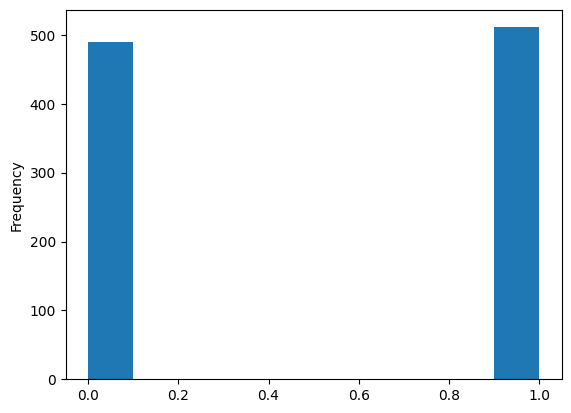

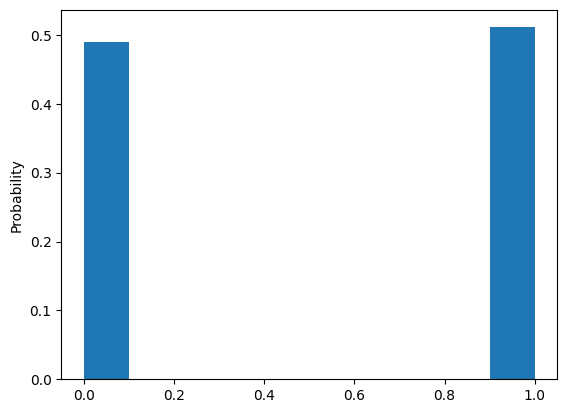

In [2]:
# Python代码模拟抛硬币
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def flip_coin(times):
    data_array = np.empty(times)
    weights_array = np.empty(times)
    weights_array.fill(1 / times)

    for i in range(0, times):
        data_array[i] = random.randint(0, 1)

    data_frame = pd.DataFrame(data_array)
    data_frame.plot(kind = 'hist', legend = False) #获取正反面统计次数的直方图 
    data_frame.plot(kind = 'hist', legend = False, weights = weights_array).set_ylabel("Probability") #获取正反面统计概率的直方图 
    plt.show()

flip_coin(1000)

**概率分布描述的其实就是随机变量的概率规律**。

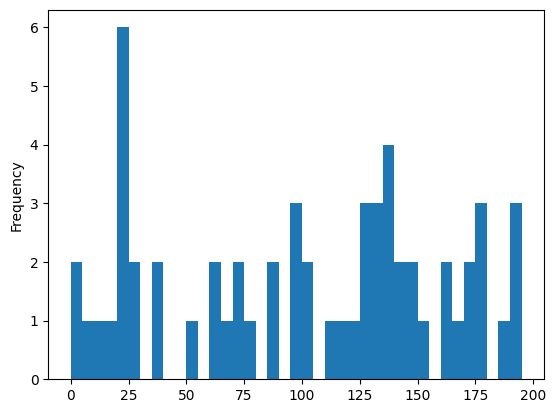

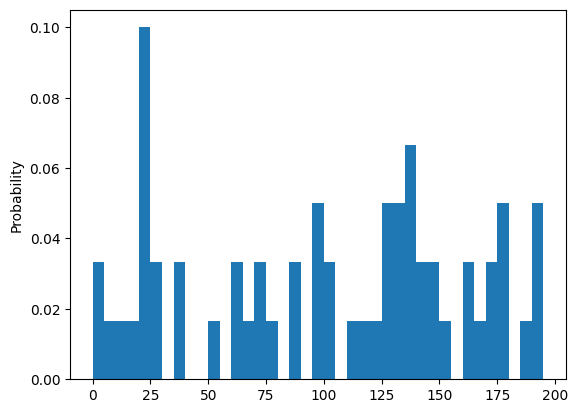

In [3]:
# 将连续型变量在特定离散化维度上测量


def check_speed(time_gap, speed_gap, total_time, min_speed, max_speed):

  times = (int)(total_time / time_gap)   #获取读取仪表盘的次数

  data_array = np.empty(times)
  weights_array = np.empty(times)
  weights_array.fill(1 / times)

  for i in range(0, times):
    if (speed_gap < 1):
      data_array[i] = random.random() * max_speed  #随机生成一个最高速和最低速之间的速度
    else:
      data_array[i] = random.randint(0, max_speed / speed_gap) * speed_gap  #随机生成一个最高速和最低速之间的速度，先除以speed_gap然后乘以speed_gap进行离散化

  data_frame = pd.DataFrame(data_array)
  bin_range = np.arange(0, 200, speed_gap)
  data_frame.plot(kind = 'hist', bins = bin_range, legend = False)  #获取时速统计次数的直方图
  data_frame.plot(kind = 'hist', bins = bin_range, legend = False, weights = weights_array, ).set_ylabel("Probability")  #获取时速统计概率的直方图
  plt.show()

check_speed(1, 5, 60, 0, 200)

**正态分布**的数据换个二维的角度看就是*橄榄球*状的分布。

**期望值**：计算多个数值的平均值，其实就是求期望值。

In [4]:
import sys
sys.path

['/Users/wenyunxin/Documents/github/computer-science-practicing/math',
 '/Library/Frameworks/Python.framework/Versions/3.11/lib/python311.zip',
 '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11',
 '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages']

## Introduction to probability

*relatvie frequency* on the frequency interpretation of probability.



Probability will be the way that we quantify how likely something is to occur.

**Experiment and event**. An *experiment* is any process, real or hypothetical, in which the possible outcomes can be identified ahead of time. An *event* is a well-defined set of possible outcomes of the experiment.

Set Theory

**Sample Space**: The collection of all possible outcome of an experiment is called the sample space of the experiment.

Rolling a Die. the sample space can be written:
```Python
S = {1, 2, 3, 4, 5, 6}
```

**Containment**: Said that a set A is *contained* in another set B if every element of the set A also belongs to the set B.
$$
A ⊆ B
$$

**Empyty Set**: The subset of S that contains non elements is called *empty set*, or *null set*, and it is denoted by the symbol `∅`. In terms of events, the empty set is any event that cannot occur.



### The definition of probability

The core concepts of probability:

- **Sample spaces**: The sample space is the set of *all possible outcomes* of a random experiment or event. It defines the scope of possible outcomes and provides a basis for assigning probabilities. For example, when flipping a fair coin, the sample space consists of two outcomes: heads or tails.
- **Events**: Events are subsets of the sample space that represent *specific* outcomes or *combinations* of outcomes. Events can be simple (single outcomes) or compound (combinations of outcomes). For instance, in rolling a fair six-sided die, the event of rolling an even number consists of the outcomes {2, 4, 6}.
- **Probability**: Probability measures the *likelihood* of an event occurring and is expressed as a number between 0 and 1. It quantifies the relative frequency of an event in the long run. Probability theory provides rules and principles for *calculating and manipulating* probabilities, such as the addition rule and the multiplication rule.
- **Probability distributions**: Probability distributions describe the likelihood of each possible outcome in a *random process*. Discrete probability distributions, such as the *binomial and Poisson distributions*, are used when outcomes are countable and distinct. Continuous probability distributions, like the *normal and exponential distributions*, model outcomes that lie on a continuum.
- **Conditional probability**: Conditional probability measures the probability of an event occurring given that *another event* has already occurred. It helps *quantify* the influence or dependency between events. Conditional probability is widely used in applications such as *media diagnostics*, *weather forecasting*, and *risk assessment*.
- **Independence**: Events are considered independent if the occurrence of one event *does not affect* the probability of another event. Independence plays a crucial role in probability calculations, and it allows for simplifications in complex scenarios. For example, when rolling two fair dice, the outcomes of each die are independent.
- **Expected value**: The expected value, also known as the *mean or average*, is a measure of the central tendency of a random variable. It represents the average value that one would expect to obtain over many repetitions of an experiment.
- **Law of large numbers and central limit theorem**: The law of large numbers states that as the number of trials or observations increases, the average outcome converges to the expected value. The central limit theorem states that the sum or average of a large number of independent and identically distributed random variables tends to follow a *normal distribution*. These principles are fundamental in understanding the behavior of random phenomena and underpin many statistical techniques.

These core concepts of probability find applications in various fields, including *statistics*, *finance*, *engineering*, *machine learning*, *genetics*, and *social sciences*. They provide a framework for understanding uncertainty, modeling random events, making predictions, and making informed decisions in the face of *uncertainty*.

## statistics

The core concepts of statistics:
- **Data types**: Statistics distinguishes between different types of data, such as numerical (continuous or discrete) and categorical (nominal or ordinal).
- **Descriptive statistics**: Descriptive statistics summarize and describe data through measures such as measures of central tendency (mean, median, mode) and measures of variability (range, variance, standard deviation). They provide insights into the characteristics and distribution of the data.
- **Sampling**: Sampling involves selecting a subset of individuals or observations from a larger population. It allows researchers to study a subset of the population and make inferences about the entire population. Sampling techniques and sample size determination are important considerations in statistics analysis.
- **Probability distributions**: Probability distributions describe the likelihood of different outcomes or values in a random process. Common probability distributions include the normal distribution, binomial distribution, Poisson distribution, and exponential distribution. Probability distributions serve as models for real-world phenomena and are used in various statistical analyses.
- **Statistical inference**: Statistical inference involves drawing conclusions or making predictions about a population based on sample data. It includes estimation and hypothesis testing. Estimation involves using sample data to estimate population parameters (e.g., mean, proportion), while hypothesis testing assesses whether observed differences or relationships in data are statistically significant.
- **Confidence intervals**: Confidence intervals provide a range of plausible values for a population parameter. They quantify the uncertainty associated with estimation and help in interpreting the precision of estimation. Confidence intervals are widely used in research and decision-making.
- **Hypothesis testing**: Hypothesis testing is used to make decisions about the validity of a claim or hypothesis based on sample data. It involves formulating null and alternative hypotheses, selecting and appropriate test statistic, and assessing the evidence against the null hypothesis. Hypothesis testing helps determine the significance of observed effects or relationships.
- **Regression analysis**: Regression analysis explores relationship between variables and helps in predicting or explaining outcomes. It involes fitting a regression model to data, estimating regression coefficients, and assessing the significance and strength of the relationships. Regression analysis is widely used in various fields, including economics, social science, and healthcare.
- **Experimental design**: Experimental design focuses on plaining and conducting controlled experiments to evaluate the effects of interventions or treatments. It involves considerations such as randomization, control groups, and blocking to minimize bias and increase the reliability of results.
- **Data visualization**: Data visualization techniques, such as graphs, chart, and plots, help in visually representing and interpreting data. Effective data visualization facilitates understanding patterns, trends, and relationship within the data.

**Descriptive statistics**: it helps in exploring and gaining insights from the data without making any generalizations or drawing conclusions beyond the dataset itself.

Some common descriptive statistics measures:
- Measures of central tendency:
  - Mean: The arithmetic average of a set of values
  - Median: The middle value that separates the dataset into two equal halves
  - *Mode*: The value or values that appear most frequently in the dataset
- Measures of *variability/Dispersion*:
  - Range: The difference between the maximum and minimum values in the dataset
  - *Variance*: The average squared deviation from the mean
  - *Standard Deviation*: The square root of the variance, representing the average amount by which the data points deviate from the mean
  - *Interquartile Range (IQR)*: The range between the first quartile (25th percentile) and the third quartile (75th percentile), representing the spread of the middle 50% of the data
- Measures of shapes:
  - *Skewness*: Indicates the asymmetry of the distribution of the data
  - *Kutosis*: Measures the peakedness or flatness of the distribution compared to a normal distribution
- Percentiles: Values that divide the dataset into specific percentile ranks, indicating the relative position of a particular value within the dataset
- Frequency Distribution: A tabular or graphical representation of the count or proportion of values that fall into different categories or intervals
- Graphical Summaries:
  - Histogram: A bar chart that displays the distribution of continuous or discrete data.
  - *Box Plot*: A graphical representation that displays the minimum, maximum, median, and quartiles of a dataset, providing a visual summary of the distribution and outliers.
  - Scatter Plot: A plot that shows the relationship between two variables by representing data points on a two-dimensional graph

**confidence intervals**（置信区间）: CI is a range of vaules that is constructed from sample data and provides an estimate of the true population parameter with a specified level of confidence. It is a measure of the uncertainty associated with estimating a population parameter based on a sample from that population.

Confidence intervals are commonly used in inferential statistics when making estimates or drawing conclusions about a population based on sample data.